In [4]:
import matplotlib.pyplot as plt
import random
import math
import numpy as np

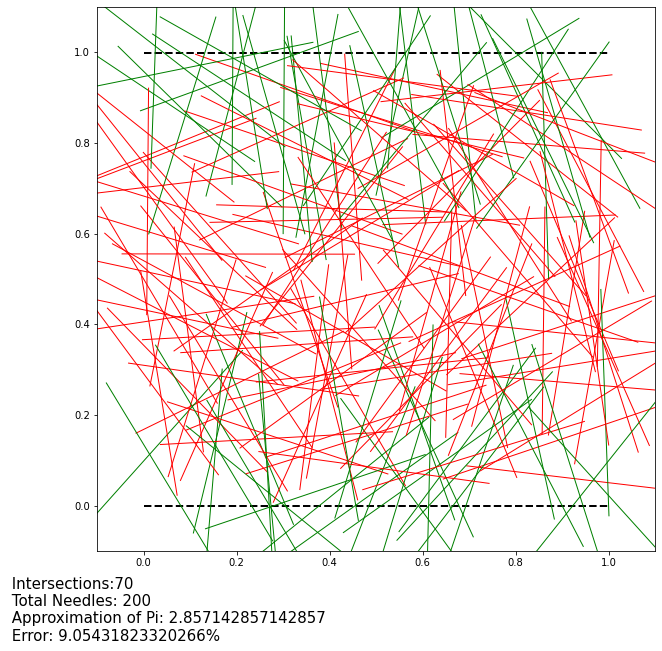

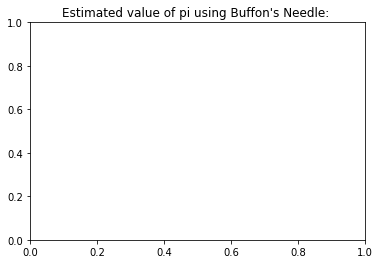

In [5]:
NUMBER_OF_NEEDLES = 1000


class Needle:
    def __init__(self, x=None, y=None, theta=None, length=0.5):
        if x is None:
            x = random.uniform(0, 1)
        if y is None:
            y = random.uniform(0, 1)
        if theta is None:
            theta = random.uniform(0, math.pi)

        self.needle_coordinates = np.array([x, y])
        self.complex_representation = np.array(
            [length/2 * math.cos(theta), length/2*math.sin(theta)])
        self.end_points = np.array([np.add(self.needle_coordinates, -1*np.array(
            self.complex_representation)), np.add(self.needle_coordinates, self.complex_representation)])

    def intersects_with_y(self, y):
        return self.end_points[0][1] < y and self.end_points[1][1] > y


class BuffonSimulation:
    def __init__(self):
        self.floor = []
        self.boards = 2
        self.list_of_needle_objects = []
        self.number_of_intersections = 0

        fig = plt.figure(figsize=(10, 10))
        self.buffon = plt.subplot()
        self.results_text = fig.text(
            0, 0, self.estimate_pi(), size=15)
        self.buffon.set_xlim(-0.1, 1.1)
        self.buffon.set_ylim(-0.1, 1.1)

    def plot_floor_boards(self):
        for j in range(self.boards):
            self.floor.append(0+j)
            self.buffon.hlines(
                y=self.floor[j], xmin=0, xmax=1, color='black', linestyle='--', linewidth=2.0)

    def toss_needles(self):
        needle_object = Needle()
        self.list_of_needle_objects.append(needle_object)
        x_coordinates = [needle_object.end_points[0]
                         [0], needle_object.end_points[1][0]]
        y_coordinates = [needle_object.end_points[0]
                         [1], needle_object.end_points[1][1]]

        for board in range(self.boards):
            if needle_object.intersects_with_y(self.floor[board]):
                self.number_of_intersections += 1
                self.buffon.plot(x_coordinates, y_coordinates,
                                 color='green', linewidth=1)
                return
        self.buffon.plot(x_coordinates, y_coordinates,
                         color='red', linewidth=1)

    def estimate_pi(self, needles_tossed=0):
        if self.number_of_intersections == 0:
            estimated_pi = 0
        else:
            estimated_pi = (needles_tossed) / \
                (1 * self.number_of_intersections)
        error = abs(((math.pi - estimated_pi)/math.pi)*100)
        return (" Intersections:" + str(self.number_of_intersections) +
                "\n Total Needles: " + str(needles_tossed) +
                "\n Approximation of Pi: " + str(estimated_pi) +
                "\n Error: " + str(error) + "%")

    def plot_needles(self):
        for needle in range(NUMBER_OF_NEEDLES):
            self.toss_needles()
            self.results_text.set_text(self.estimate_pi(needle+1))
            if (needle+1) % 200 == 0:
                plt.pause(1/200)
        plt.title("Estimated value of pi using Buffon's Needle: ")

    def plot(self):
        self.plot_floor_boards()
        self.plot_needles()
        plt.show()


simulation = BuffonSimulation()
simulation.plot()